In [158]:
import pandas as pd
import os.path as op
from tqdm.contrib.itertools import product
import numpy as np
import seaborn as sns

In [159]:
def get_cvr2(subject, session, mask='npcr', bids_folder='/data/ds-risk'):
    subject = int(subject)

    fn = op.join(bids_folder, 'derivatives', 'decoded_pdfs.volume.cv_voxel_selection.denoise.natural_space', f'sub-{subject:02d}',
    'func', f'sub-{subject:02d}_ses-{session}_mask-{mask}_space-T1w_r2s.tsv')

    # fn = op.join(bids_folder, 'derivatives', 'decoded_pdfs.volume.cv_voxel_selection.denoise.retroicor', f'sub-{subject:02d}',
    # 'func', f'sub-{subject:02d}_ses-{session}_mask-{mask}_space-T1w_r2s.tsv')

    if op.exists(fn):
        df = pd.read_csv(fn, sep='\t', index_col=[0,1,2,3])
        # print(df)
        df['mask'] = mask
        df = df.set_index('mask', append=True)
        print(df)
        return df
    else:
        return pd.DataFrame(np.zeros((0,0)))

In [160]:
subjects = list(range(2, 32))
subjects.pop(subjects.index(24))

24

In [161]:
df = []
for subject, session in product(subjects, ['3t2', '7t2']):
    try:
        d = get_cvr2(subject, session)
        d.columns.name = 'voxel'
        if len(d) != 0:
            df.append(d.stack().to_frame('r2'))
        # print(df[-1])
    except Exception as e:
        print(e)

df = pd.concat(df)

  0%|          | 0/58 [00:00<?, ?it/s]

                                                 0         1         2  \
subject session test_run1 test_run2 mask                                 
2       3t2     1         2         npcr -0.013518 -0.057103  0.039901   
                          3         npcr -0.103823  0.008785  0.012290   
                          4         npcr -0.014717 -0.402823 -0.039283   
                          5         npcr -0.000874 -0.245463 -0.033748   
                          6         npcr -0.031567 -0.093408 -0.044884   
                          7         npcr -0.028834 -0.046275 -0.012070   
                          8         npcr -0.402633  0.000195 -0.156449   
                2         1         npcr -0.076809 -0.036103 -0.346678   
                          3         npcr -0.068059  0.085095 -0.050506   
                          4         npcr -0.007544 -0.026579 -0.068392   
                          5         npcr -0.013891 -0.299085 -0.009715   
                          6         np

In [162]:
prop_0 = df.groupby(['subject', 'session', 'test_run1', 'voxel']).mean().groupby(['subject', 'session', 'test_run1']).apply(lambda d: (d>0.0).mean())
sum_0 = df.groupby(['subject', 'session', 'test_run1', 'voxel']).mean().groupby(['subject', 'session', 'test_run1']).apply(lambda d: (d>0.0).sum())

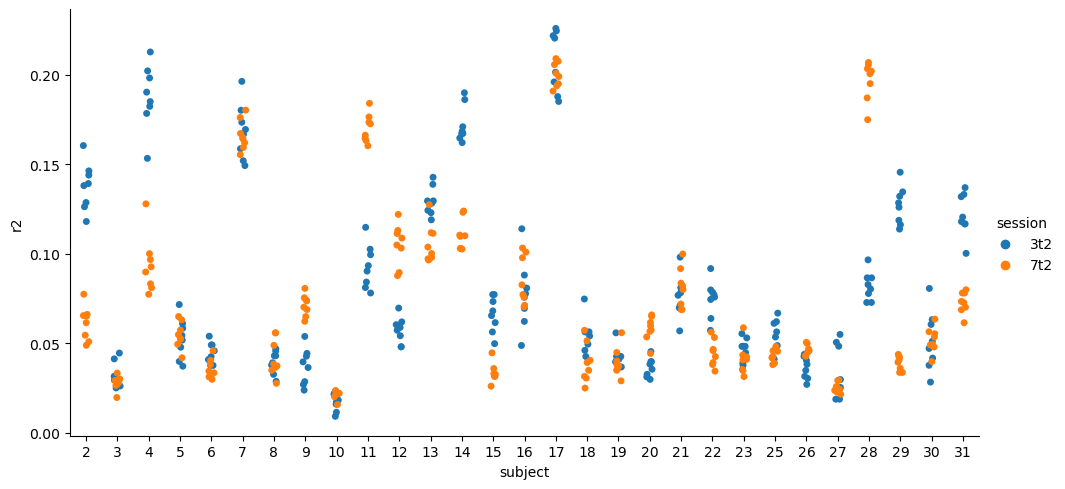

In [163]:
sns.catplot(x='subject', y='r2', hue='session', data=prop_0, aspect=2.)

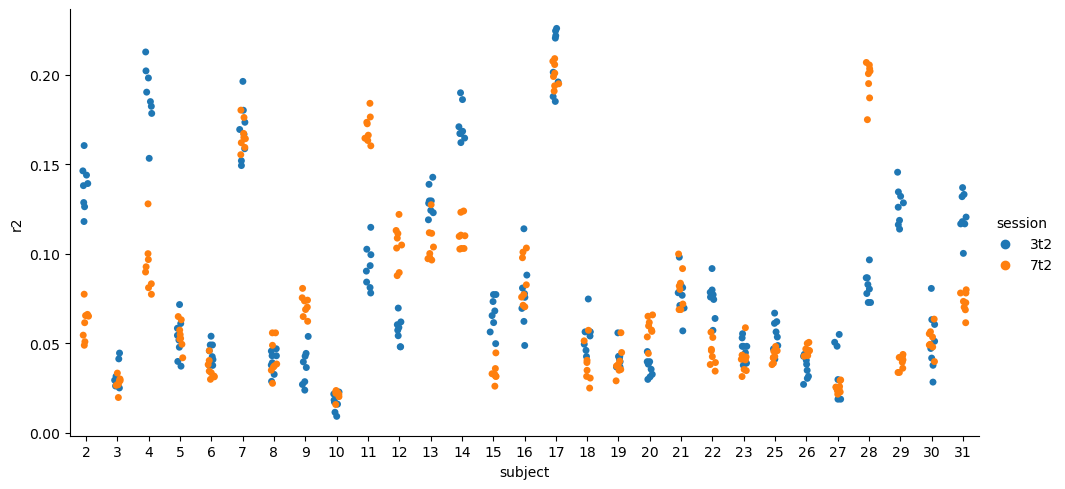

In [164]:
sns.catplot(x='subject', y='r2', hue='session', data=prop_0, aspect=2.)

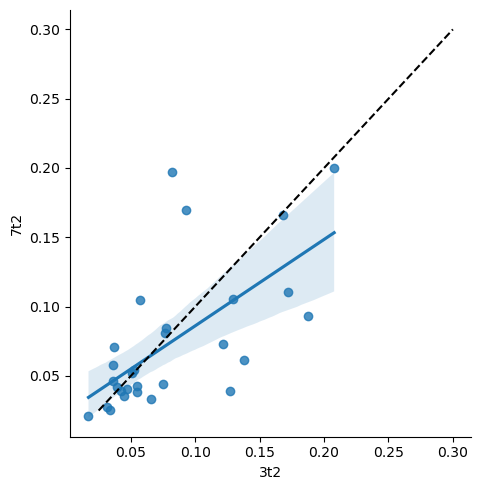

In [165]:
# sns.catplot(x='subject', y='r2', hue='session', data=prop_0)
import matplotlib.pyplot as plt
sns.lmplot(x='3t2', y='7t2', data=prop_0.unstack('session').groupby('subject').mean().droplevel(0, axis=1))
plt.plot([0.025, 0.3], [0.025, 0.3], c='k', ls='--')

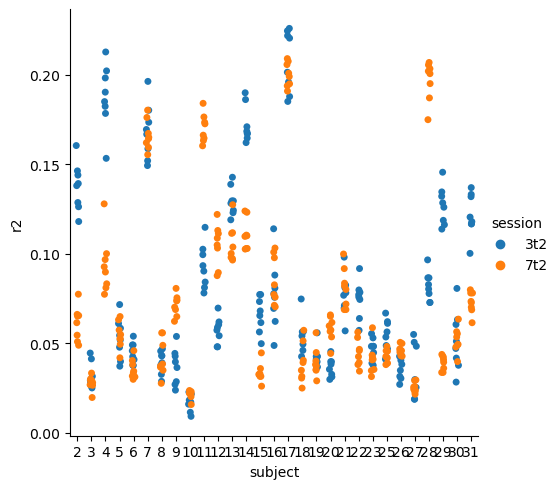

In [166]:
sns.catplot(x='subject', y='r2', hue='session', data=prop_0)

Text(34.193628472222215, 0.5, 'Optimal number of voxels according to CV2-r2')

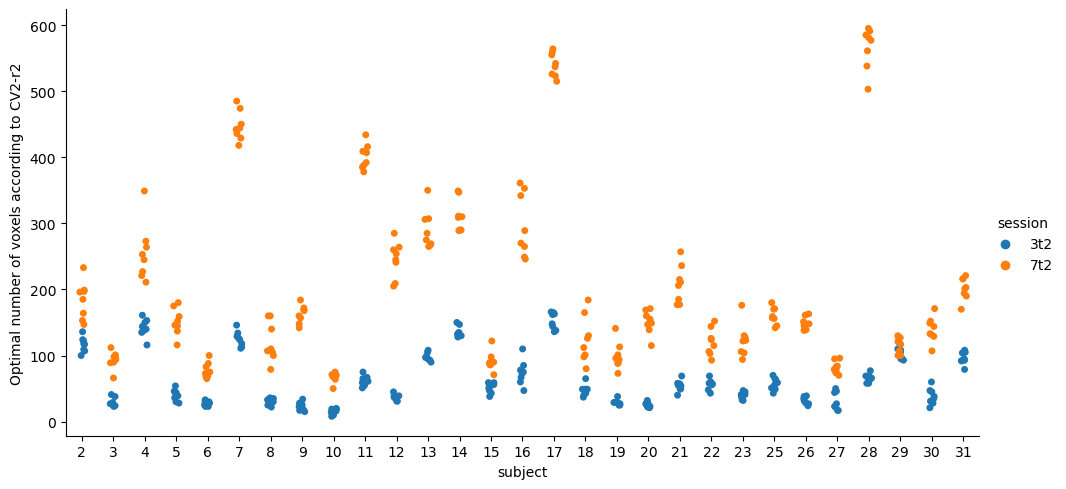

In [172]:
sns.catplot(x='subject', y='r2', hue='session', data=sum_0, aspect=2.)
plt.ylabel('Optimal number of voxels according to CV2-r2')

In [168]:
sum_0.groupby(['subject', 'session']).mean().groupby('session').describe()

r2                                                            \
        count        mean         std     min      25%     50%      75%   
session                                                                   
3t2      29.0   63.219828   40.219579  15.125   30.875   50.50   96.000   
7t2      29.0  206.107759  135.116739  67.625  120.125  151.25  255.375   

                  
             max  
session           
3t2      152.750  
7t2      566.375

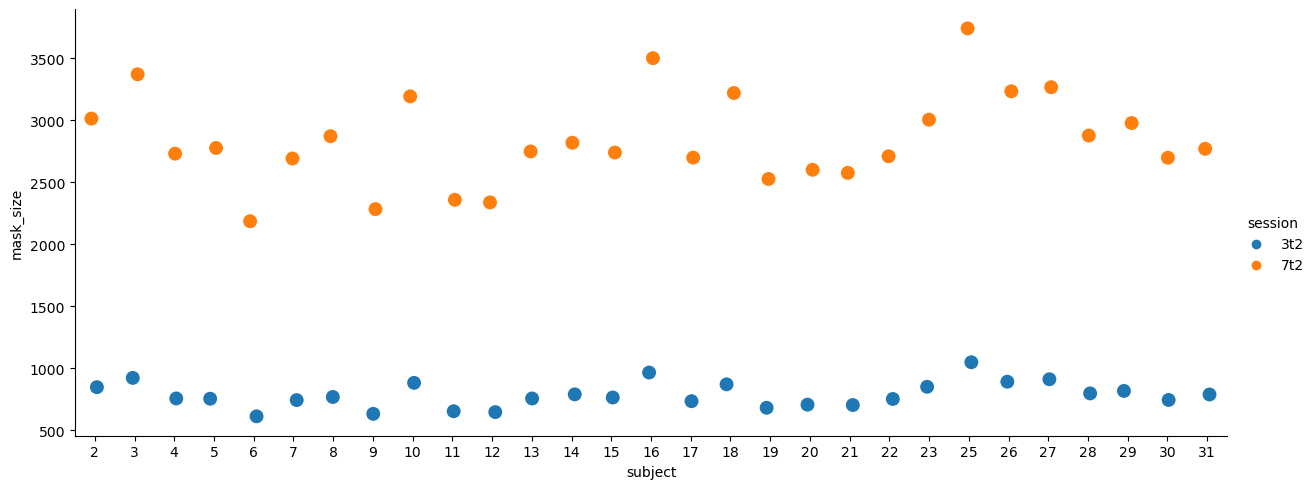

In [169]:
mask_size = df.groupby(['subject', 'session', 'voxel']).mean().groupby(['subject', 'session']).size()

sns.catplot(x='subject', y='mask_size', hue='session', data=mask_size.to_frame('mask_size'), aspect=2.5, size=10)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


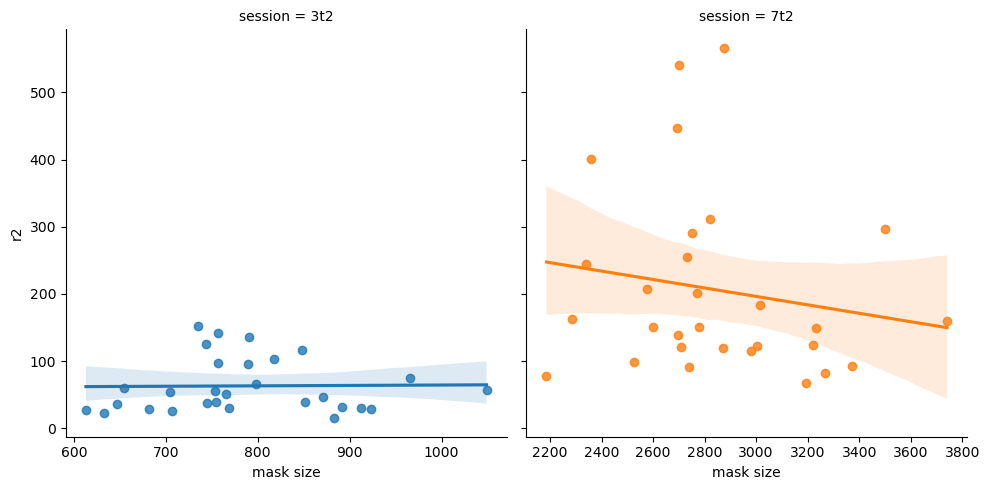

In [170]:
tmp = mask_size.to_frame('mask size').join(sum_0)

sns.lmplot(data=tmp.groupby(['subject', 'session']).mean().reset_index(), x='mask size', y='r2', hue='session', col='session', sharex=False)